In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import seaborn as sns
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from functools import partial

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

### dataset properties

In [3]:
df=pd.read_csv("CarPrice_Assignment.csv")

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

numerical or categorical value relationship analysis  with price

In [8]:
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


#### graphical analysis data properties

Produce graphical summaries of the price by categorical values


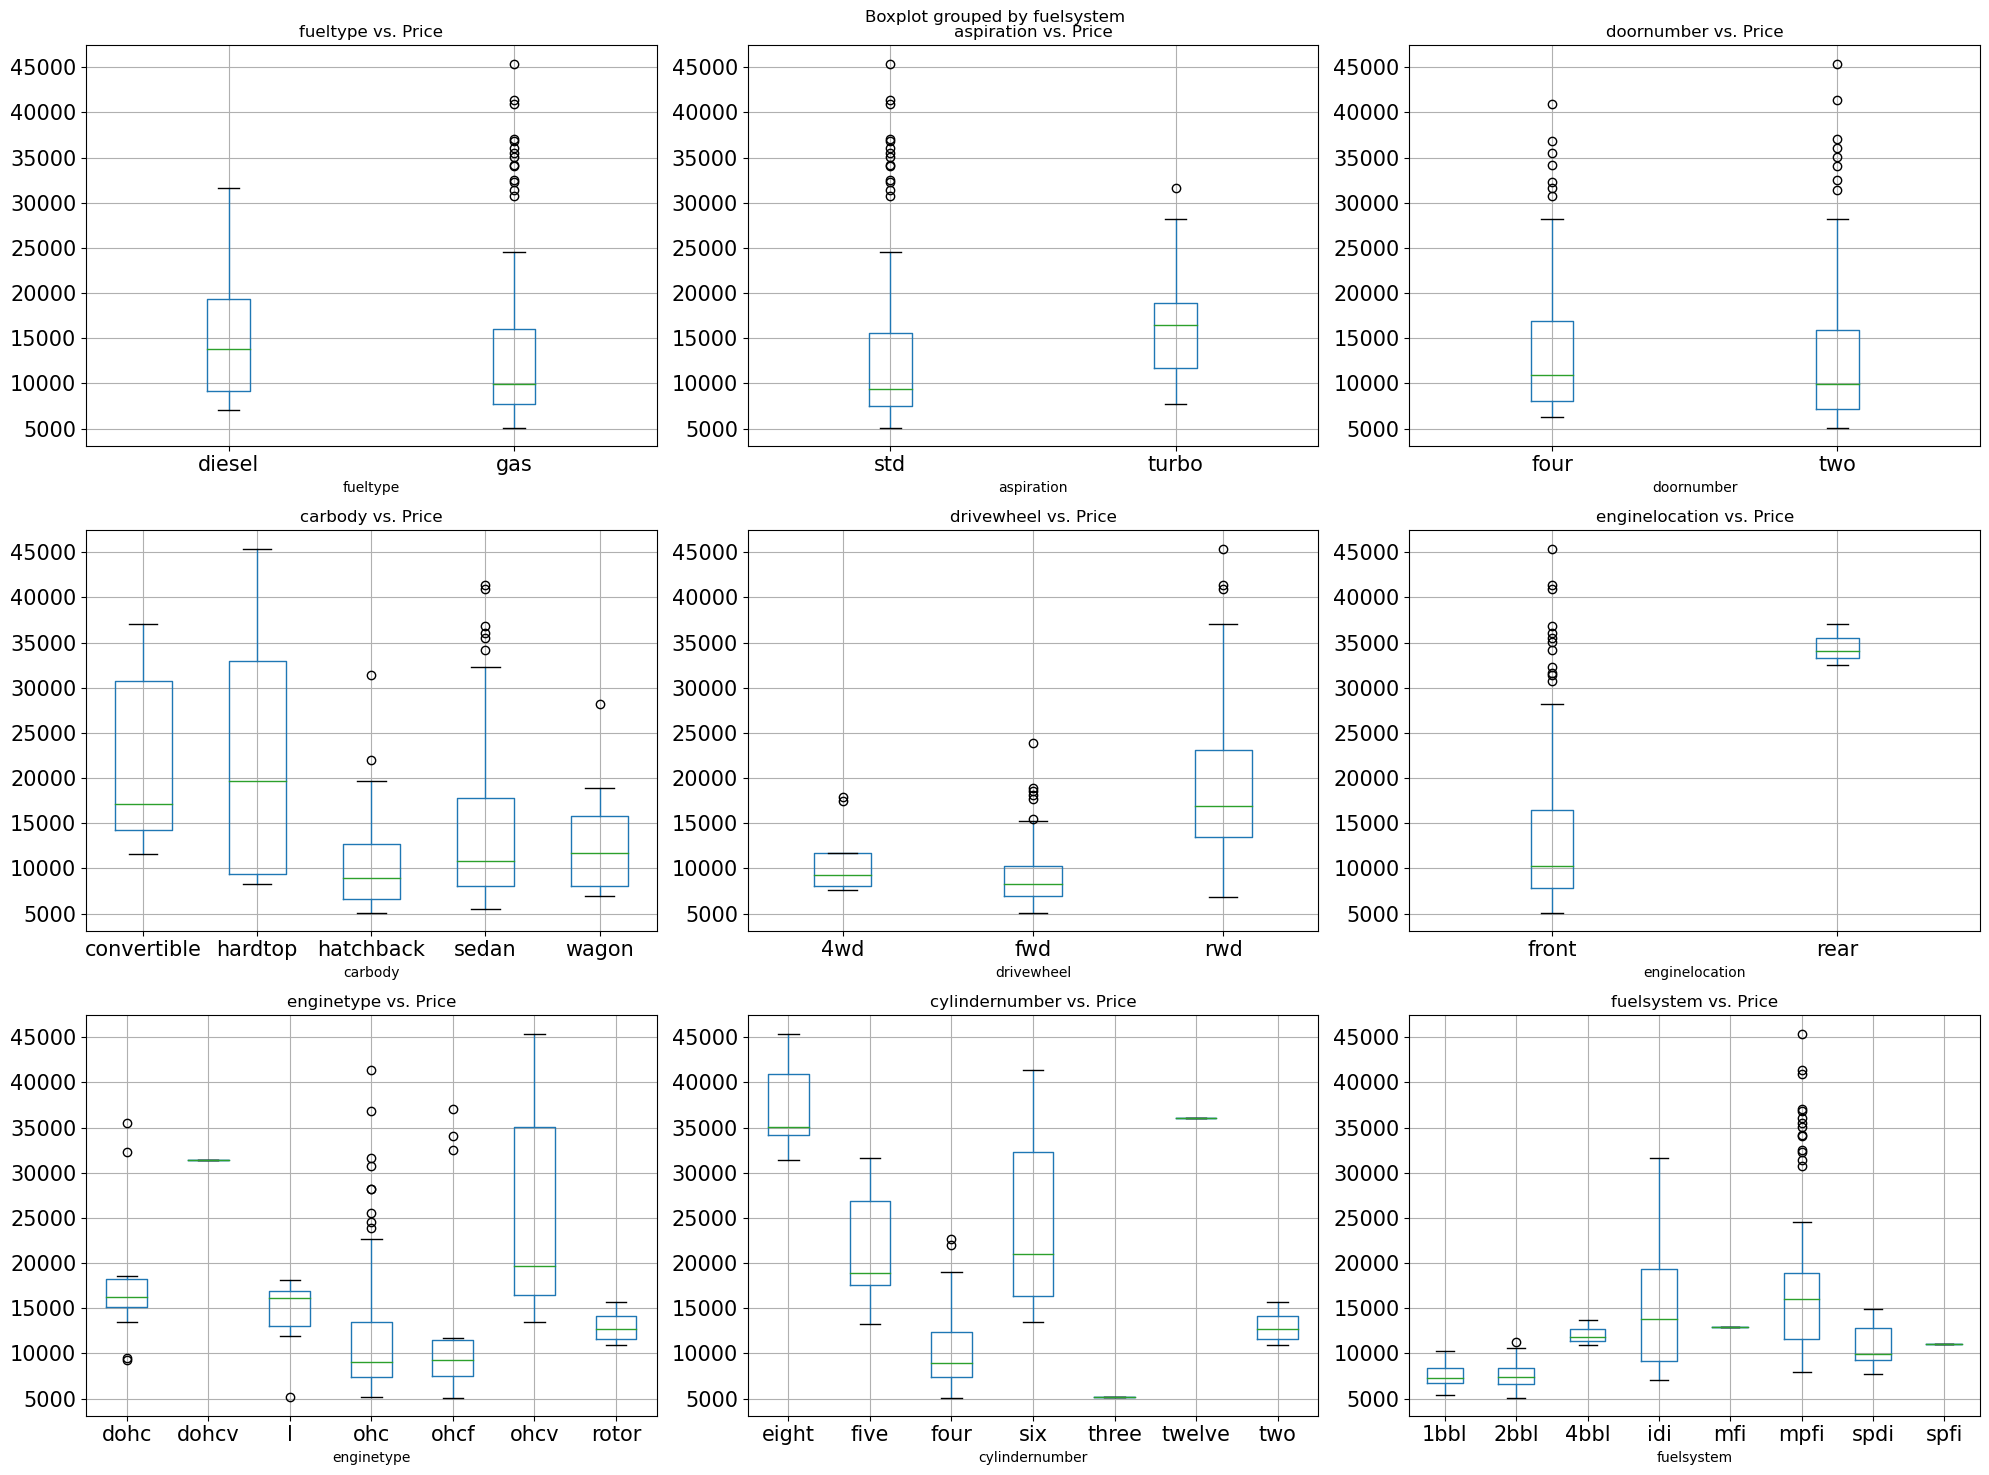

In [9]:

fig, ax = subplots(ncols=3, nrows=3, figsize=(20,15))
for i, feature in enumerate(categorical_columns):
    df.boxplot('price',by=feature, ax=ax[i//3,i%3], fontsize=15);
    ax[i//3, i%3].set_title(f'{feature} vs. Price')

plt.tight_layout()
plt.show()

correlation matrix  price with numerical values

In [10]:
cor_matrix=df[numerical_features].corr()
cor_matrix

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


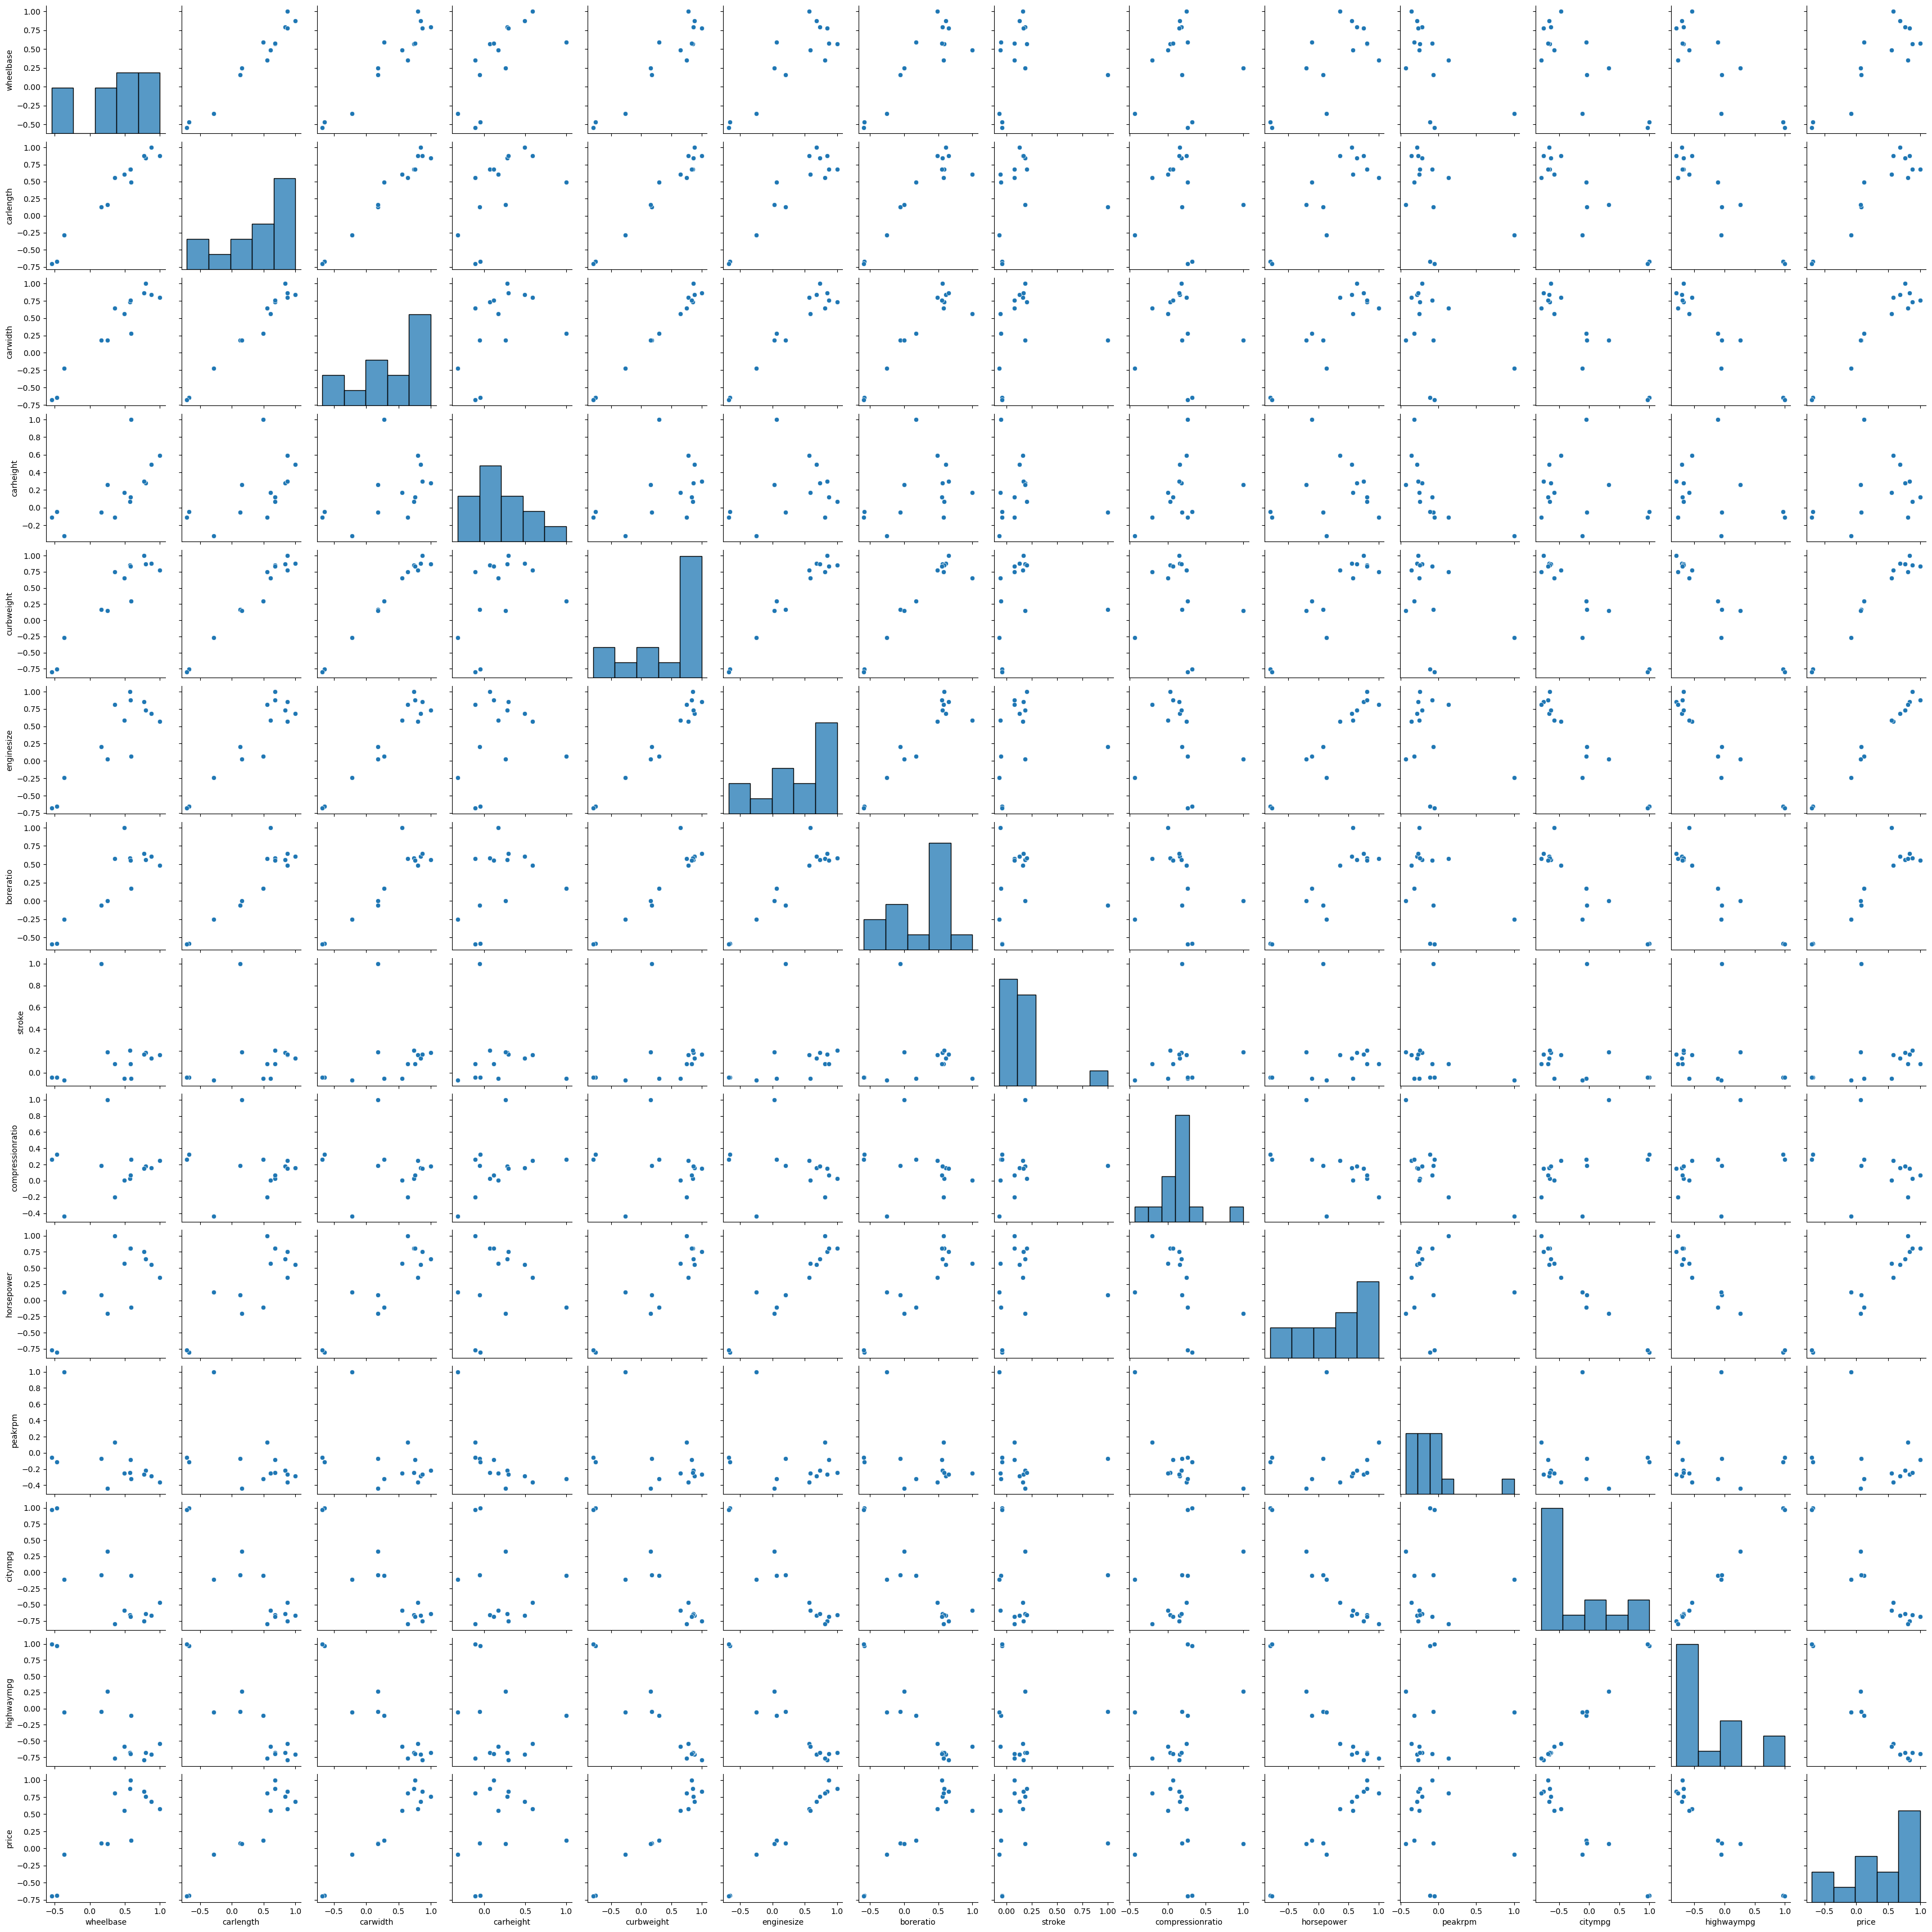

In [11]:
sns.pairplot(cor_matrix)

### data preprocessing

In [12]:
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['model'] = df['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df=df.drop('car_ID', axis=1)

categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand', 'model']
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                     'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                     'peakrpm', 'citympg', 'highwaympg']

In [13]:
categories_encoder =LabelEncoder()
for col in categorical_columns:
    df[col] = categories_encoder.fit_transform(df[col])

In [14]:
df[categorical_columns].head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,brand,model
0,1,0,1,0,2,0,0,2,5,1,79
1,1,0,1,0,2,0,0,2,5,1,123
2,1,0,1,2,2,0,5,3,5,1,29
3,1,0,0,3,1,0,3,2,5,2,1
4,1,0,0,3,0,0,3,1,5,2,2


In [15]:
Y=df['price']
X=np.asarray(df.drop(['price','CarName'], axis=1))


Xs = X - X.mean(0)[None,:]
X_scale = X.std(0)
Xs = Xs / X_scale[None,:]

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
Xs_train = X_train - X_train.mean(0)[None,:]
X_scale = X_train.std(0)
Xs_train = Xs_train / X_scale[None,:]

In [17]:
k=10
kfold = skm.KFold(k,
                  random_state=0,
                  shuffle=True)
scaler =StandardScaler(with_mean= True, with_std=True)

#### Lasso

In [18]:
lassoCV = skl.ElasticNetCV(n_alphas=100, 
                             l1_ratio=1,
                             cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                           ('lasso', lassoCV)])
pipeCV.fit(X_train, Y_train)
tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.alpha_

135.51103961310204

In [19]:
lambdas, soln_array = skl.Lasso.path(Xs_train, 
                                      Y_train,
                                      l1_ratio=1,
                                      n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                           columns=df.drop(['price', 'CarName'], axis=1).columns,
                           index=-np.log(lambdas))

#### the coefficient plot of the standardized coefficients that depending on the choice of tuning parameter

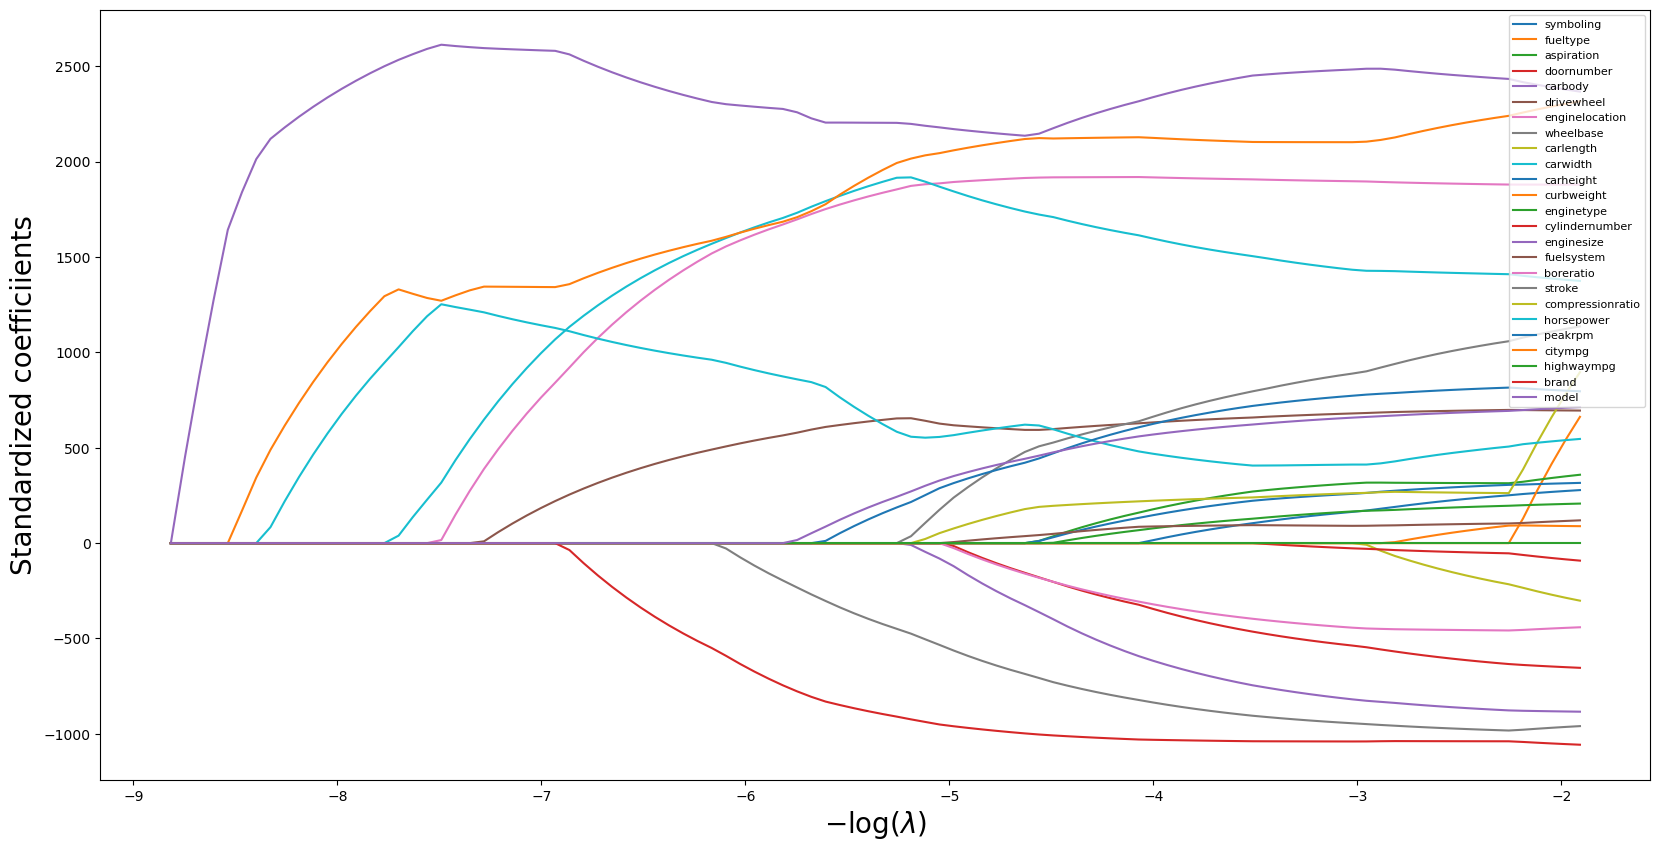

In [20]:
path_fig, ax = subplots(figsize=(20,10))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper right', prop={'size' : 8})
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);

In [21]:
np.min(tuned_lasso.mse_path_.mean(1))

7108867.850574851

#### plot of the cross_validation error

C:\Users\lhj52\AppData\Local\Temp\ipykernel_23380\2079200110.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


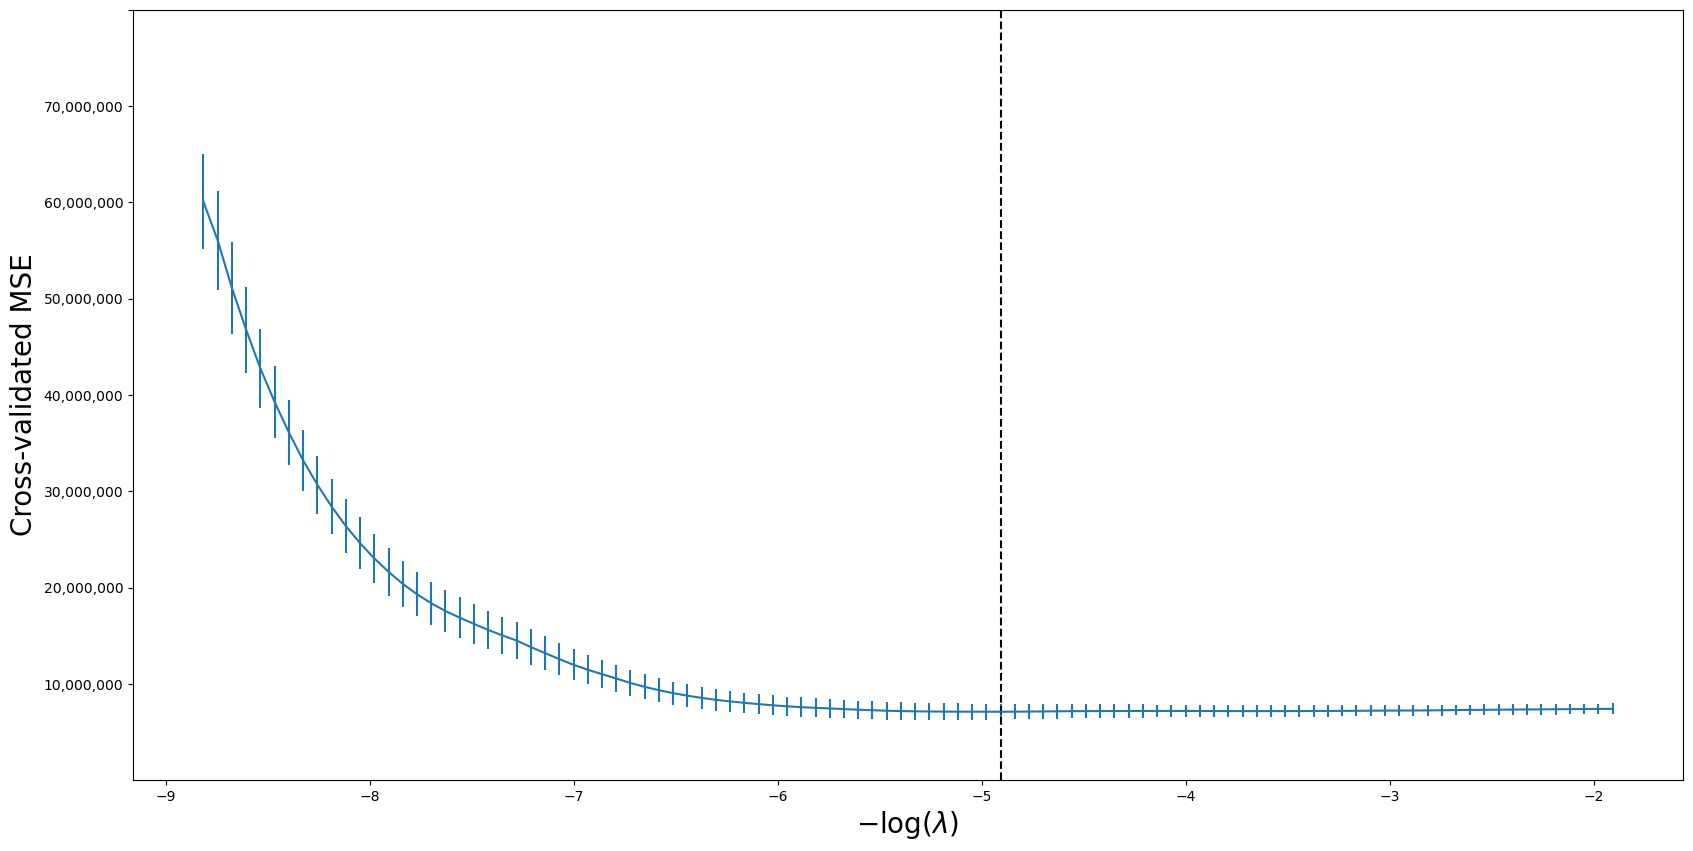

In [22]:
lassoCV_fig, ax = subplots(figsize=(20,10))
ax.errorbar(-np.log(tuned_lasso.alphas_),
              tuned_lasso.mse_path_.mean(1),
              yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(k))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_ylim([50000,80000000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

In [23]:
tuned_lasso.coef_

array([   0.        ,   -0.        ,    0.        ,  -47.37632665,
       -167.95894995,  612.21467859, 1898.4038433 ,  294.49853141,
          0.        , 1819.52105133,    0.        , 2072.98567743,
          0.        ,   -0.        , 2162.81974802,   12.67458263,
        -56.64656088, -591.30278717,  100.41756293,  579.32666969,
        339.37936702,   -0.        ,   -0.        , -968.85182971,
        372.52720404])

In [24]:
tuned_lasso.alpha_

135.51103961310204

In [25]:
columns = df.drop(['price', 'CarName'], axis=1).columns
coefficients = tuned_lasso.coef_
# 칼럼 이름과 coef_ 값을 매칭하여 표 형태로 출력
result = pd.DataFrame({'Column': columns, 'Coefficient': coefficients})
print(result)

              Column  Coefficient
0          symboling     0.000000
1           fueltype    -0.000000
2         aspiration     0.000000
3         doornumber   -47.376327
4            carbody  -167.958950
5         drivewheel   612.214679
6     enginelocation  1898.403843
7          wheelbase   294.498531
8          carlength     0.000000
9           carwidth  1819.521051
10         carheight     0.000000
11        curbweight  2072.985677
12        enginetype     0.000000
13    cylindernumber    -0.000000
14        enginesize  2162.819748
15        fuelsystem    12.674583
16         boreratio   -56.646561
17            stroke  -591.302787
18  compressionratio   100.417563
19        horsepower   579.326670
20           peakrpm   339.379367
21           citympg    -0.000000
22        highwaympg    -0.000000
23             brand  -968.851830
24             model   372.527204


In [26]:
outer_valid = skm.ShuffleSplit(n_splits=1, 
                                 test_size=0.25,
                                 random_state=1)
inner_cv = skm.KFold(n_splits=10,
                       shuffle=True,
                       random_state=2)
lassoCV = skl.ElasticNetCV(n_alphas=100,
                             l1_ratio=1,
                             cv=inner_cv)
pipeCV = Pipeline(steps=[('scaler', scaler),
                           ('lasso', lassoCV)])

In [27]:
result = skm.cross_validate(pipeCV,
                            X_train,
                            Y_train,
                            cv=outer_valid,
                            scoring='r2')
result['test_score']

array([0.87925413])

#### Evaluating Test Error of Cross-Validated Lasso

In [28]:
outer_valid = skm.ShuffleSplit(n_splits=1, 
                                 test_size=0.25,
                                 random_state=1)
inner_cv = skm.KFold(n_splits=10,
                       shuffle=True,
                       random_state=2)
lassoCV = skl.ElasticNetCV(n_alphas=100,
                             l1_ratio=1,
                             cv=inner_cv)
pipeCV = Pipeline(steps=[('scaler', scaler),
                           ('lasso', lassoCV)])
  

In [29]:
result = skm.cross_validate(pipeCV,
                            X_test,
                            Y_test,
                            cv=outer_valid,
                            scoring='r2')
result['test_score']

C:\Users\lhj52\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243479.76824568212, tolerance: 181494.82379629632
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\lhj52\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250808.97916972637, tolerance: 181494.82379629632
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\lhj52\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191404.1857997477, tolerance: 181494.82379629632
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\lhj52\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:61

C:\Users\lhj52\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 274843.14285853505, tolerance: 268910.5987407408
  model = cd_fast.enet_coordinate_descent_gram(


array([0.75169318])